In [275]:
import nltk 
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import word2vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re

In [276]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data processing

#### 1) Lowercase conversion
#### 2) Removing numerical data
#### 3) Removing Punctuations
#### 4) Tokenizing Data
#### 5) Remove Stopwords


In [277]:
corpus = [
    'my name is Abhishek.',
    'I love to play basketball 1007 !!!',
    'He is a good player 4567@,',
    'The basketball game  $#%^&*008 is a huge event.',
    'my phone number is 8768@@2987',
    'Michael Jordan is considered one of the greatest basketball players of all time.',
    "I bought a new basketball yesterday and can't wait to try it out.",
    'The referee blew the whistle to signal the end of the game.',
    'Our team won the match by scoring a three-pointer in the last second!',
    'She practices dribbling every morning to improve her ball control.',
    'Basketball requires both physical fitness and mental focus to excel.',
    'The fans cheered loudly as their favorite player dunked the ball.',
    'I joined a basketball league to compete with other skilled players.',
    'He wore his lucky jersey during the finals and played exceptionally well.',
    'Learning defensive techniques has helped me become a stronger player.',
    'The coach gave us tips on how to improve our passing accuracy.',
    'Watching basketball tutorials online has helped me understand the game better.',
    'The court was slippery after the rain, but we still managed to play safely.',
    'My dream is to play professional basketball and represent my country.',
    'She scored 20 points in the game and was named MVP of the tournament!',

    
]

In [278]:
#cleaning the above sample dataset

s = "i play KEYBOrd 987656,!@#"

In [279]:
s.lower()   # this converts to lower case

'i play keybord 987656,!@#'

In [280]:
re.sub(r'\d+', "", s)  # this removes number

'i play KEYBOrd ,!@#'

In [281]:
string.punctuation  # removes punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [282]:
s.translate(str.maketrans('', '', string.punctuation))   # this removes punctuations

'i play KEYBOrd 987656'

In [283]:
word_tokenize(s)   # this tokenizes the sentence into words

['i', 'play', 'KEYBOrd', '987656', ',', '!', '@', '#']

In [284]:
s1 = word_tokenize(s)   # this tokenizes the sentence into words



In [285]:
[i for i in s1 if i not in stopwords.words('english')]  # this removes stopwords

['play', 'KEYBOrd', '987656', ',', '!', '@', '#']

In [286]:
# function for preporocessing using the above steps


def word_preporocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove digits
    text = re.sub(r'\d+', "", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text into words
    word = word_tokenize(text)
    
    # Remove stopwords from tokenized words
    word = [i for i in word if i not in stopwords.words('english')]
    
    return word

In [287]:
preprocessed_corpus = [word_preporocessing(sentence) for sentence in corpus]
preprocessed_corpus  # this data will be sent into the word2vec model


[['name', 'abhishek'],
 ['love', 'play', 'basketball'],
 ['good', 'player'],
 ['basketball', 'game', 'huge', 'event'],
 ['phone', 'number'],
 ['michael',
  'jordan',
  'considered',
  'one',
  'greatest',
  'basketball',
  'players',
  'time'],
 ['bought', 'new', 'basketball', 'yesterday', 'cant', 'wait', 'try'],
 ['referee', 'blew', 'whistle', 'signal', 'end', 'game'],
 ['team', 'match', 'scoring', 'threepointer', 'last', 'second'],
 ['practices', 'dribbling', 'every', 'morning', 'improve', 'ball', 'control'],
 ['basketball', 'requires', 'physical', 'fitness', 'mental', 'focus', 'excel'],
 ['fans', 'cheered', 'loudly', 'favorite', 'player', 'dunked', 'ball'],
 ['joined', 'basketball', 'league', 'compete', 'skilled', 'players'],
 ['wore', 'lucky', 'jersey', 'finals', 'played', 'exceptionally', 'well'],
 ['learning',
  'defensive',
  'techniques',
  'helped',
  'become',
  'stronger',
  'player'],
 ['coach', 'gave', 'us', 'tips', 'improve', 'passing', 'accuracy'],
 ['watching',
  'baske

In [288]:
preprocessed_corpus

[['name', 'abhishek'],
 ['love', 'play', 'basketball'],
 ['good', 'player'],
 ['basketball', 'game', 'huge', 'event'],
 ['phone', 'number'],
 ['michael',
  'jordan',
  'considered',
  'one',
  'greatest',
  'basketball',
  'players',
  'time'],
 ['bought', 'new', 'basketball', 'yesterday', 'cant', 'wait', 'try'],
 ['referee', 'blew', 'whistle', 'signal', 'end', 'game'],
 ['team', 'match', 'scoring', 'threepointer', 'last', 'second'],
 ['practices', 'dribbling', 'every', 'morning', 'improve', 'ball', 'control'],
 ['basketball', 'requires', 'physical', 'fitness', 'mental', 'focus', 'excel'],
 ['fans', 'cheered', 'loudly', 'favorite', 'player', 'dunked', 'ball'],
 ['joined', 'basketball', 'league', 'compete', 'skilled', 'players'],
 ['wore', 'lucky', 'jersey', 'finals', 'played', 'exceptionally', 'well'],
 ['learning',
  'defensive',
  'techniques',
  'helped',
  'become',
  'stronger',
  'player'],
 ['coach', 'gave', 'us', 'tips', 'improve', 'passing', 'accuracy'],
 ['watching',
  'baske

In [289]:
from gensim.models import Word2Vec

In [290]:
word2vec_cbow = Word2Vec(sentences= preprocessed_corpus, vector_size=100, window=5, min_count=1, sg=0) # this is the CBOW model 
word2vec_skipgram = Word2Vec(sentences= preprocessed_corpus, vector_size=100, window=5, min_count=1, sg=1)  # this is the skipgram model 


In [291]:
word2vec_cbow  # this is the CBOW model

In [292]:
len(word2vec_cbow.wv['jordan'])

100

In [293]:
word2vec_cbow.wv['jordan']

array([-4.2923908e-03, -9.3190055e-03, -1.8647051e-03, -3.7317255e-03,
        9.1141537e-03,  2.9302058e-03, -5.9828297e-03, -3.3505415e-03,
       -9.9011483e-03,  1.9320167e-03, -3.9933068e-03, -2.7203066e-03,
        5.1804460e-03,  7.5971885e-03,  4.3973722e-03, -6.8276357e-03,
        6.7022820e-03, -9.6434029e-03, -7.0010941e-03, -8.0292812e-03,
       -2.2588859e-03,  4.8555096e-04, -3.7769664e-03,  1.8420089e-03,
        9.2129298e-03,  6.6955499e-03, -1.0645875e-03,  9.0984935e-03,
        1.5567287e-03, -1.9701887e-03, -6.5991287e-03,  6.4778007e-03,
       -9.0706311e-03, -1.9079510e-03,  7.6880017e-03, -2.5738848e-03,
        1.6023398e-03, -7.3546600e-03,  4.9868184e-03,  7.3620705e-03,
       -9.3152719e-03, -3.2886667e-03,  7.8991372e-03,  2.9339462e-03,
        1.6171522e-05,  3.3284756e-04, -9.8726582e-03,  9.9444492e-03,
       -1.9968480e-03, -4.8812088e-03,  2.7480132e-03,  1.0219226e-03,
       -5.9341588e-03,  5.7982136e-03, -2.5087800e-03, -6.1730235e-03,
      

In [294]:
word2vec_skipgram  # this is the skipgram model

In [295]:
len(word2vec_skipgram.wv['jordan'])

100

In [296]:
word2vec_skipgram.wv['jordan']

array([-4.2717713e-03, -9.3441643e-03, -1.8389820e-03, -3.7416951e-03,
        9.1227982e-03,  2.9433214e-03, -5.9536132e-03, -3.3486725e-03,
       -9.9290004e-03,  1.9173182e-03, -4.0071257e-03, -2.7273563e-03,
        5.1846867e-03,  7.5829797e-03,  4.4140704e-03, -6.8409368e-03,
        6.7183906e-03, -9.6555660e-03, -7.0198043e-03, -8.0692302e-03,
       -2.2778802e-03,  4.9119908e-04, -3.7624310e-03,  1.8021404e-03,
        9.2273010e-03,  6.6972459e-03, -1.0666486e-03,  9.1070142e-03,
        1.5192085e-03, -1.9864086e-03, -6.6036675e-03,  6.4878189e-03,
       -9.0454910e-03, -1.9312713e-03,  7.6529984e-03, -2.5732245e-03,
        1.5795762e-03, -7.3787984e-03,  4.9669049e-03,  7.3352121e-03,
       -9.2990277e-03, -3.2742030e-03,  7.9011032e-03,  2.9365313e-03,
        3.0168918e-05,  3.1178398e-04, -9.8902974e-03,  9.9207982e-03,
       -2.0061801e-03, -4.8582274e-03,  2.7238724e-03,  1.0225697e-03,
       -5.9585669e-03,  5.8007552e-03, -2.5197291e-03, -6.1893556e-03,
      

In [297]:
word2vec_skipgram.wv['jersey']

array([ 0.00937922,  0.0073986 ,  0.00689814,  0.00608119,  0.00502518,
       -0.0019566 ,  0.00014175,  0.0053647 , -0.0067912 ,  0.0024504 ,
       -0.00385121,  0.00830564,  0.00588287, -0.00549677,  0.00253223,
       -0.00398412, -0.00966294, -0.00038281,  0.00057039, -0.00731861,
        0.00156146,  0.00156959, -0.00904733, -0.00212487, -0.00198738,
        0.00479634,  0.00558545,  0.00609002,  0.00194128, -0.00804989,
        0.00018293,  0.00991558,  0.00897316,  0.00566516,  0.00299518,
        0.00512528, -0.00440758, -0.00512304, -0.00039667, -0.0049246 ,
        0.00605422,  0.00755476, -0.00083923, -0.00905025, -0.00423364,
       -0.00759339, -0.00821757,  0.00208063,  0.00303523, -0.00525631,
       -0.0074426 ,  0.00037008,  0.00084605,  0.00059765,  0.00787395,
       -0.0019701 , -0.00950887,  0.00600162,  0.00780284, -0.00595141,
        0.00804148,  0.00508376, -0.00247211, -0.00171543,  0.00631624,
        0.00810444,  0.00856701, -0.00689777,  0.00031821, -0.00

In [298]:
word2vec_skipgram.wv.most_similar('jersey', topn=3) 

[('tutorials', 0.24609214067459106),
 ('gave', 0.236622616648674),
 ('stronger', 0.2186606228351593)]

In [299]:
word2vec_cbow.wv['michael']

array([ 2.2238907e-03, -7.5258538e-03,  5.6391009e-03, -5.0239055e-03,
       -3.2576018e-03, -1.8481137e-03,  8.2212957e-03,  2.2623013e-03,
       -9.1207231e-04, -2.8598453e-03, -2.1162331e-03, -1.2965261e-03,
       -5.0780005e-03, -4.1287937e-03,  2.0208517e-04,  4.5435061e-03,
        1.8017372e-03,  6.8937694e-03,  6.2565226e-04, -3.2578332e-03,
       -7.3632495e-03,  6.0215183e-03,  6.9712806e-03, -6.0652001e-03,
        4.6890466e-03,  9.5143178e-03, -6.3934410e-03, -2.8704174e-03,
       -9.0970816e-03,  3.2329473e-03, -3.4445897e-03,  2.0477730e-03,
        9.4386311e-03, -8.3725043e-03, -9.3185464e-03,  1.7285754e-03,
       -8.0308001e-03, -9.0760095e-03, -9.3499590e-03, -3.0408011e-04,
       -1.1096714e-03,  7.3580880e-04, -1.3419478e-03,  9.0404740e-03,
        8.7906113e-03, -6.3604461e-03,  8.6838342e-03, -9.0173185e-03,
       -1.3346587e-03,  2.5508665e-03, -1.1460030e-04, -3.8165119e-03,
        4.6279098e-04,  1.0080603e-03, -9.4120605e-03, -4.8863101e-03,
      

In [300]:
word2vec_cbow.wv.most_similar('michael', topn=3)

[('improve', 0.349438339471817),
 ('new', 0.26499491930007935),
 ('team', 0.24796968698501587)]

In [301]:
word2vec_cbow.wv.similarity('jordan', 'jersey')

-0.042254347

In [302]:
word2vec_cbow.wv.index_to_key

['basketball',
 'game',
 'play',
 'player',
 'helped',
 'ball',
 'improve',
 'players',
 'last',
 'whistle',
 'signal',
 'end',
 'team',
 'match',
 'scoring',
 'threepointer',
 'tournament',
 'second',
 'practices',
 'dribbling',
 'blew',
 'morning',
 'control',
 'requires',
 'physical',
 'fitness',
 'every',
 'wait',
 'referee',
 'jordan',
 'abhishek',
 'love',
 'good',
 'huge',
 'event',
 'phone',
 'number',
 'michael',
 'considered',
 'try',
 'one',
 'greatest',
 'time',
 'bought',
 'new',
 'yesterday',
 'cant',
 'focus',
 'mental',
 'excel',
 'mvp',
 'rain',
 'passing',
 'accuracy',
 'watching',
 'tutorials',
 'online',
 'understand',
 'better',
 'court',
 'slippery',
 'still',
 'us',
 'managed',
 'safely',
 'dream',
 'professional',
 'represent',
 'country',
 'scored',
 'points',
 'named',
 'tips',
 'gave',
 'fans',
 'lucky',
 'cheered',
 'loudly',
 'favorite',
 'dunked',
 'joined',
 'league',
 'compete',
 'skilled',
 'wore',
 'jersey',
 'coach',
 'finals',
 'played',
 'exceptiona

In [303]:
word2vec_cbow.wv.similarity('match', 'improve')

0.01360241

In [304]:
word2vec_cbow.wv.most_similar('jordan', topn=10)

[('wore', 0.25106996297836304),
 ('scored', 0.17421291768550873),
 ('finals', 0.17162176966667175),
 ('play', 0.17125217616558075),
 ('tips', 0.15264011919498444),
 ('league', 0.14836515486240387),
 ('control', 0.13676364719867706),
 ('requires', 0.13290202617645264),
 ('stronger', 0.1255854368209839),
 ('greatest', 0.1170310527086258)]

In [305]:
word2vec_skipgram.wv.most_similar('jordan', topn=10)

[('wore', 0.2510955333709717),
 ('scored', 0.17490196228027344),
 ('finals', 0.17287729680538177),
 ('play', 0.17175577580928802),
 ('tips', 0.15326723456382751),
 ('league', 0.1485784500837326),
 ('control', 0.13625386357307434),
 ('requires', 0.13406580686569214),
 ('stronger', 0.12713098526000977),
 ('greatest', 0.11783678084611893)]

In [306]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [307]:
word_vectors = word2vec_cbow.wv
vocab = list(word_vectors.index_to_key)

In [325]:
vocab 

['basketball',
 'game',
 'play',
 'player',
 'helped',
 'ball',
 'improve',
 'players',
 'last',
 'whistle',
 'signal',
 'end',
 'team',
 'match',
 'scoring',
 'threepointer',
 'tournament',
 'second',
 'practices',
 'dribbling',
 'blew',
 'morning',
 'control',
 'requires',
 'physical',
 'fitness',
 'every',
 'wait',
 'referee',
 'jordan',
 'abhishek',
 'love',
 'good',
 'huge',
 'event',
 'phone',
 'number',
 'michael',
 'considered',
 'try',
 'one',
 'greatest',
 'time',
 'bought',
 'new',
 'yesterday',
 'cant',
 'focus',
 'mental',
 'excel',
 'mvp',
 'rain',
 'passing',
 'accuracy',
 'watching',
 'tutorials',
 'online',
 'understand',
 'better',
 'court',
 'slippery',
 'still',
 'us',
 'managed',
 'safely',
 'dream',
 'professional',
 'represent',
 'country',
 'scored',
 'points',
 'named',
 'tips',
 'gave',
 'fans',
 'lucky',
 'cheered',
 'loudly',
 'favorite',
 'dunked',
 'joined',
 'league',
 'compete',
 'skilled',
 'wore',
 'jersey',
 'coach',
 'finals',
 'played',
 'exceptiona

In [349]:
len(vocab)

97

In [376]:
x = np.array([word_vectors[i] for i in vocab])


In [377]:
x

array([[-5.3488667e-04,  2.5496405e-04,  5.1124198e-03, ...,
        -7.0675435e-03,  9.0413040e-04,  6.3706664e-03],
       [-8.6192563e-03,  3.6835663e-03,  5.1874765e-03, ...,
        -2.4059331e-03, -9.5128203e-03,  4.4959616e-03],
       [ 9.5194941e-05,  3.0768029e-03, -6.8144454e-03, ...,
         5.1411637e-04,  8.2139550e-03, -7.0173135e-03],
       ...,
       [ 1.9143203e-03,  4.5176018e-03,  1.4475270e-03, ...,
        -3.3171668e-03, -3.1291824e-03, -3.3211899e-03],
       [ 3.8198100e-03,  1.5853224e-03, -3.1406134e-03, ...,
        -6.1351769e-03,  8.9217036e-05, -8.5872654e-03],
       [-6.9582625e-03, -4.3026565e-04,  3.7009718e-03, ...,
        -4.3847314e-03, -3.5104402e-03,  7.9125827e-03]], dtype=float32)

In [378]:
tsne = TSNE(n_components=2)     # TSNE is a technique for dimensionality reduction or decomposes a high-dimensional dataset into a lower-dimensional space.
tsne                #also converted 97th dimension into 2D dimension

TSNE()

In [379]:
x_new_embedings =tsne.fit_transform(x)
x_new_embedings

array([[ 2.2293236 ,  1.7882011 ],
       [ 2.213709  ,  4.015796  ],
       [ 2.373634  , -0.16444348],
       [ 1.1230199 , -1.5275283 ],
       [-1.1024274 ,  3.6620066 ],
       [ 2.14232   , -0.9717188 ],
       [-0.13377878, -0.5956467 ],
       [ 0.9293947 ,  3.473234  ],
       [ 3.3124156 , -0.3869725 ],
       [ 2.737612  ,  2.3273256 ],
       [-2.7621    , -0.04288559],
       [ 0.78430986,  0.8227918 ],
       [-1.5960094 , -0.40744522],
       [-0.72664183,  4.1790304 ],
       [ 0.8600161 , -0.6050225 ],
       [ 2.3368769 ,  4.9504876 ],
       [-1.5827483 , -1.5989978 ],
       [ 0.67412984,  1.5420915 ],
       [ 2.7125802 ,  3.2767975 ],
       [ 1.0125568 ,  3.4135468 ],
       [ 1.7523925 ,  0.33288205],
       [-1.3621305 ,  2.5660958 ],
       [ 1.7788869 ,  4.3280764 ],
       [-3.3049831 ,  2.500671  ],
       [ 0.21244869,  2.1127183 ],
       [-0.36087713,  2.3876085 ],
       [-1.0508649 ,  2.7744784 ],
       [ 3.475074  ,  0.4021811 ],
       [-0.11829019,

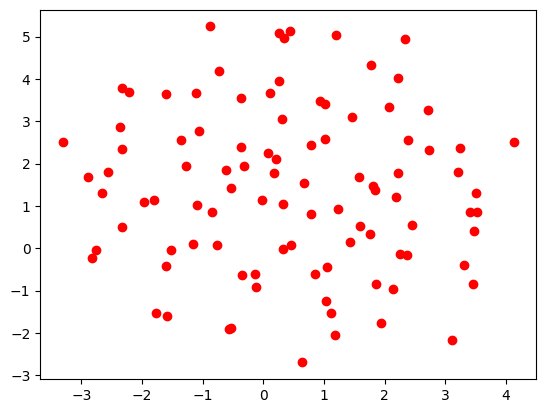

In [380]:
plt.Figure(figsize=(12,6))
plt.scatter(x_new_embedings[:,0], x_new_embedings[:,1], marker='o', color='red')

In [381]:
vocab

['basketball',
 'game',
 'play',
 'player',
 'helped',
 'ball',
 'improve',
 'players',
 'last',
 'whistle',
 'signal',
 'end',
 'team',
 'match',
 'scoring',
 'threepointer',
 'tournament',
 'second',
 'practices',
 'dribbling',
 'blew',
 'morning',
 'control',
 'requires',
 'physical',
 'fitness',
 'every',
 'wait',
 'referee',
 'jordan',
 'abhishek',
 'love',
 'good',
 'huge',
 'event',
 'phone',
 'number',
 'michael',
 'considered',
 'try',
 'one',
 'greatest',
 'time',
 'bought',
 'new',
 'yesterday',
 'cant',
 'focus',
 'mental',
 'excel',
 'mvp',
 'rain',
 'passing',
 'accuracy',
 'watching',
 'tutorials',
 'online',
 'understand',
 'better',
 'court',
 'slippery',
 'still',
 'us',
 'managed',
 'safely',
 'dream',
 'professional',
 'represent',
 'country',
 'scored',
 'points',
 'named',
 'tips',
 'gave',
 'fans',
 'lucky',
 'cheered',
 'loudly',
 'favorite',
 'dunked',
 'joined',
 'league',
 'compete',
 'skilled',
 'wore',
 'jersey',
 'coach',
 'finals',
 'played',
 'exceptiona

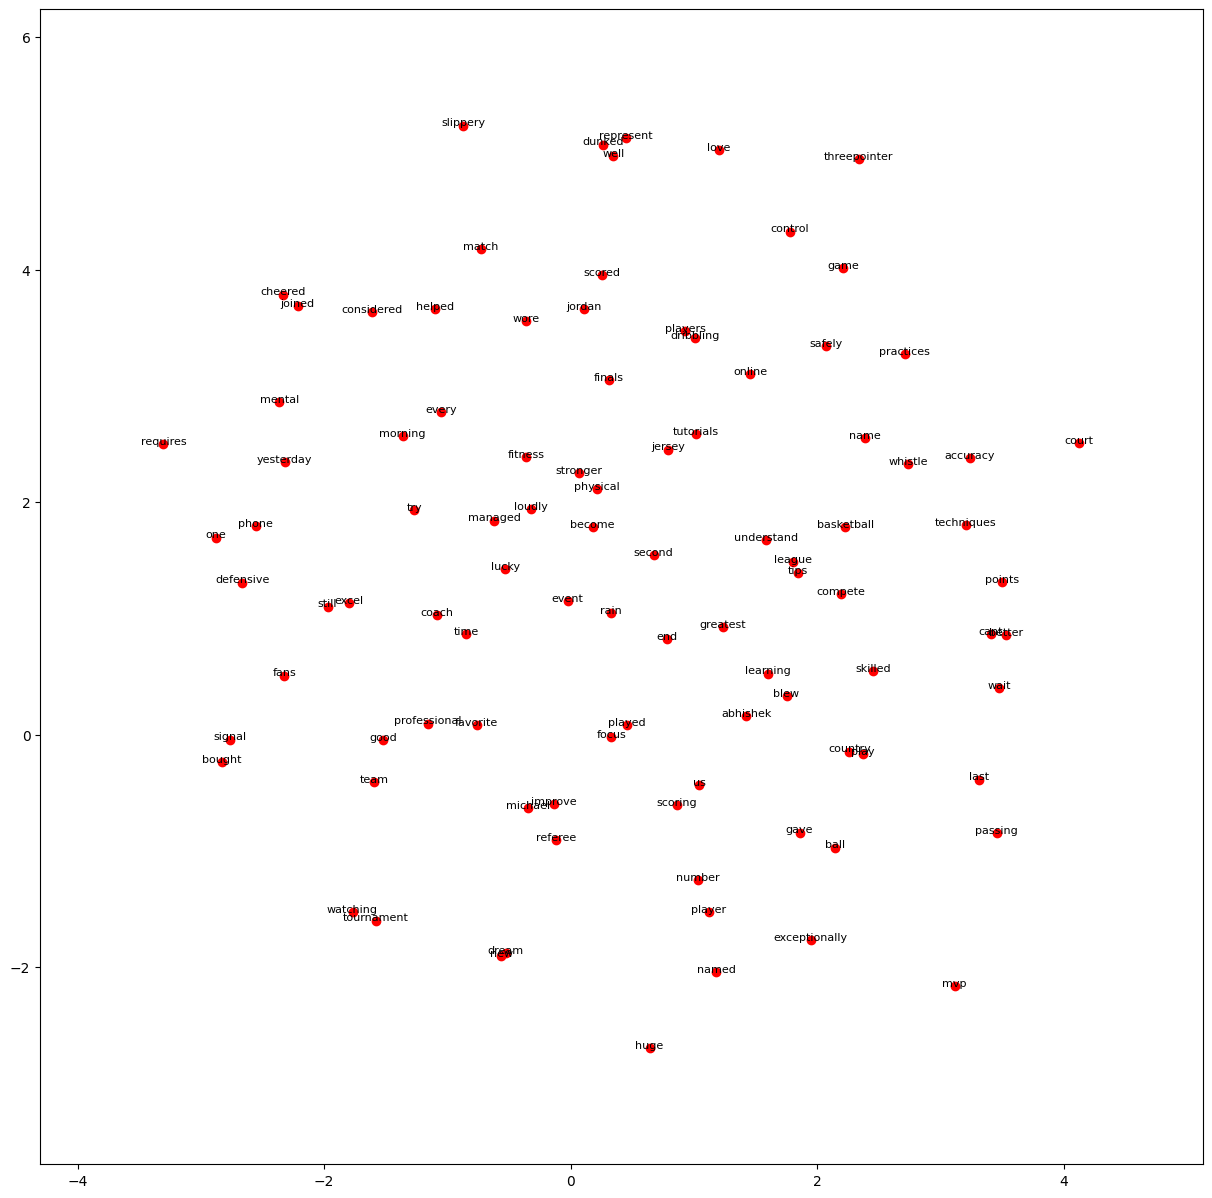

<Figure size 640x480 with 0 Axes>

In [384]:
import matplotlib.pyplot as plt

plt.ion()
plt.figure(figsize=(15,15))
plt.scatter(x_new_embedings[:,0], x_new_embedings[:,1], marker='o', color='red')

for i, words in enumerate(vocab[:len(x_new_embedings)]): 
    plt.annotate(words, xy=(x_new_embedings[i,0], x_new_embedings[i,1]), ha='center', fontsize=8)

plt.xlim(x_new_embedings[:,0].min() - 1, x_new_embedings[:,0].max() + 1)
plt.ylim(x_new_embedings[:,1].min() - 1, x_new_embedings[:,1].max() + 1)

plt.pause(0.5)
plt.clf()

In [5]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize



text = "My name is Abhishek, i am currently working on GenAI, LLMS, and also developed ChatGPT model's "

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
word_tokenize(text)

['My',
 'name',
 'is',
 'Abhishek',
 ',',
 'i',
 'am',
 'currently',
 'working',
 'on',
 'GenAI',
 ',',
 'LLMS',
 ',',
 'and',
 'also',
 'developed',
 'ChatGPT',
 'model',
 "'s"]

In [3]:
from nltk import ne_chunk, pos_tag

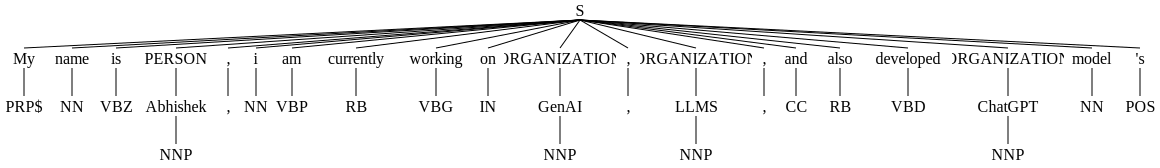

In [4]:
ne_chunk(pos_tag(word_tokenize(text)))

In [1]:
from transformers import pipeline

/opt/anaconda3/envs/genAI/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-26 17:15:03.690904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
ner_generation = pipeline('ner', model= "dbmdz/bert-large-cased-finetuned-conll03-english")

All PyTorch model weights were used when initializing TFBertForTokenClassification.

All the weights of TFBertForTokenClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


In [10]:
ner = ner_generation(text)
ner  

[{'entity': 'B-PER',
  'score': 0.99861693,
  'index': 4,
  'word': 'A',
  'start': 11,
  'end': 12},
 {'entity': 'B-PER',
  'score': 0.9931357,
  'index': 5,
  'word': '##b',
  'start': 12,
  'end': 13},
 {'entity': 'B-PER',
  'score': 0.64888924,
  'index': 6,
  'word': '##his',
  'start': 13,
  'end': 16},
 {'entity': 'B-PER',
  'score': 0.57696515,
  'index': 7,
  'word': '##he',
  'start': 16,
  'end': 18},
 {'entity': 'B-PER',
  'score': 0.8360645,
  'index': 8,
  'word': '##k',
  'start': 18,
  'end': 19},
 {'entity': 'B-ORG',
  'score': 0.55660343,
  'index': 15,
  'word': 'Gen',
  'start': 47,
  'end': 50},
 {'entity': 'I-MISC',
  'score': 0.9594034,
  'index': 16,
  'word': '##A',
  'start': 50,
  'end': 51},
 {'entity': 'B-ORG',
  'score': 0.96150225,
  'index': 19,
  'word': 'LL',
  'start': 54,
  'end': 56},
 {'entity': 'I-ORG',
  'score': 0.7195581,
  'index': 20,
  'word': '##MS',
  'start': 56,
  'end': 58},
 {'entity': 'B-MISC',
  'score': 0.93976146,
  'index': 25,
  